In [1]:
import pandas as pd

# Load the dataset (replace with your actual file path)
data = pd.read_csv(r'C:\Users\kaurm\OneDrive\Desktop\dataset.csv')

# Verify that the data is loaded
print(data.head())


                     id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateUpdated  \
0    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
1    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
2    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
3    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
4    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   

                  dimension  ean                         keys  ...  \
0  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
1  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
2 

In [2]:
print(data.isnull().sum())
print(data.columns)
print(data.shape)

id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64
Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       

In [5]:
# Verify columns before dropping
print(data.columns)

# Drop columns with too many missing values
columns_to_drop = ['reviews.userCity', 'reviews.userProvince', 'sizes']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Drop rows where critical columns have missing values
data = data.dropna(subset=['reviews.text', 'reviews.rating'])

# Fill missing values in numerical and categorical columns
if 'reviews.numHelpful' in data.columns:
    data['reviews.numHelpful'] = data['reviews.numHelpful'].fillna(data['reviews.numHelpful'].mean())
if 'colors' in data.columns:
    data['colors'] = data['colors'].fillna('Unknown')

# Check the cleaned data
print(data.isnull().sum())
print(data.shape)

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username', 'upc', 'weight'],
      dtype='object')
id                       0
asins                    0
brand                    0
categories               0
colors                   0
dateAdded                0
dateUpdated              0
dimension              620
ean                    484
keys                     0
manufacturer           451
manufacturerNumber     479
name                     0
prices                   0
reviews.date           217
reviews.doRecommend    638
reviews.numHelpful       0
reviews.rating           0
reviews.sourceURLs       0
reviews.text             0
reviews.title            0
reviews.username         0
upc       

In [8]:
# Retain only the relevant columns
data = data[['reviews.text', 'reviews.rating', 'reviews.title']]

# Verify the remaining columns
print(data.columns)
data.to_csv('filtered_dataset.csv', index=False)
print("Filtered dataset saved to 'filtered_dataset.csv'")


Index(['reviews.text', 'reviews.rating', 'reviews.title'], dtype='object')
Filtered dataset saved to 'filtered_dataset.csv'


In [10]:
from textblob import TextBlob

# Add a sentiment polarity column
data['sentiment'] = data['reviews.text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the first few rows to verify
print(data[['reviews.text', 'sentiment']].head())
data.to_csv('sentiment_dataset.csv', index=False)
print("Dataset with sentiment scores saved to 'sentiment_dataset.csv'")



                                        reviews.text  sentiment
0  I initially had trouble deciding between the p...   0.200259
1  Allow me to preface this with a little history...   0.159591
2  I am enjoying it so far. Great for reading. Ha...   0.420833
3  I bought one of the first Paperwhites and have...   0.148821
4  I have to say upfront - I don't like coroporat...   0.267086
Dataset with sentiment scores saved to 'sentiment_dataset.csv'


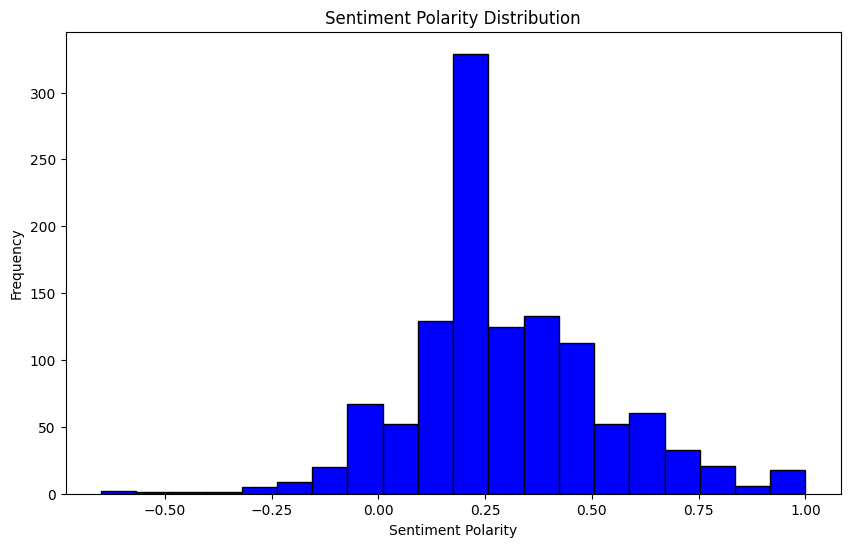

In [12]:
import matplotlib.pyplot as plt

# Histogram for sentiment polarity distribution
plt.figure(figsize=(10, 6))
plt.hist(data['sentiment'], bins=20, color='blue', edgecolor='black')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


In [15]:
 def classify_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

# Create the sentiment_category column
data['sentiment_category'] = data['sentiment'].apply(classify_sentiment)

# Verify the column is added
print(data['sentiment_category'].head())

0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: sentiment_category, dtype: object


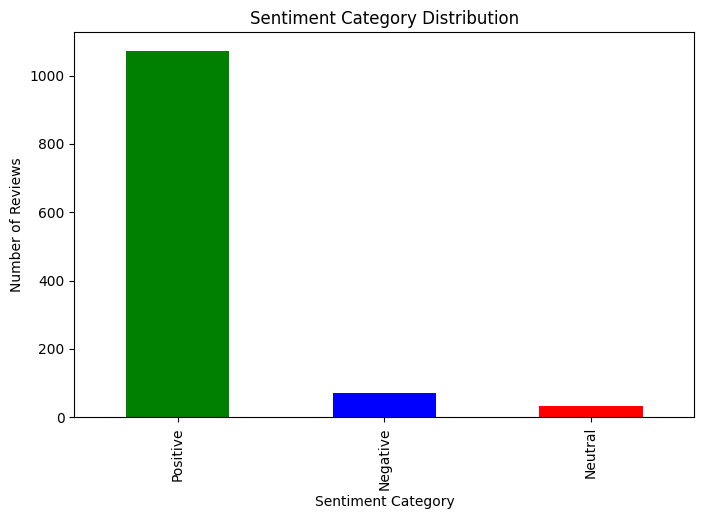

In [16]:
import matplotlib.pyplot as plt

# Bar chart for sentiment category distribution
plt.figure(figsize=(8, 5))
data['sentiment_category'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()

In [17]:
# Descriptive statistics for sentiment scores
print(data['sentiment'].describe())


count    1177.000000
mean        0.299778
std         0.229738
min        -0.650000
25%         0.175070
50%         0.250000
75%         0.430000
max         1.000000
Name: sentiment, dtype: float64


In [18]:
# Count of each sentiment category
print(data['sentiment_category'].value_counts())

# Percentage distribution
print(data['sentiment_category'].value_counts(normalize=True) * 100)


sentiment_category
Positive    1073
Negative      70
Neutral       34
Name: count, dtype: int64
sentiment_category
Positive    91.163976
Negative     5.947324
Neutral      2.888700
Name: proportion, dtype: float64


In [19]:
# Correlation between sentiment polarity and ratings
correlation = data[['sentiment', 'reviews.rating']].corr()
print(correlation)

                sentiment  reviews.rating
sentiment        1.000000        0.318508
reviews.rating   0.318508        1.000000


In [20]:
# Most positive reviews
print("Most Positive Reviews:")
print(data[data['sentiment'] > 0.9][['reviews.text', 'sentiment']].head())

# Most negative reviews
print("\nMost Negative Reviews:")
print(data[data['sentiment'] < -0.9][['reviews.text', 'sentiment']].head())


Most Positive Reviews:
                                          reviews.text  sentiment
528  The case does what it is supposed to do. I thi...        1.0
660                                            Perfect        1.0
663                                        Good case!!        1.0
947  This is the one to get after Amazon's update t...        1.0
966  Works just like echo but portable!! Great stuf...        1.0

Most Negative Reviews:
Empty DataFrame
Columns: [reviews.text, sentiment]
Index: []
